# Fake News Detection Using Machine Learning Algorithms

## Data Preparation

In [6]:
import pandas as pd

print("data/Constraint_Train.csv info\n")
Constraint_Train_df = pd.read_csv('data/Constraint_Train.csv')
Constraint_Train_df.info()

print("\n\ndata/Constraint_Train.csv info\n")
Constraint_Train_df = pd.read_csv('data/Constraint_Train.csv')
Constraint_Train_df.info()

print("\n\ndata/Constraint_Val.csv info\n")
Constraint_Val_df = pd.read_csv('data/Constraint_Val.csv')
Constraint_Val_df.info()

print("\n\ndata/english_test_with_labels.csv info\n")
english_test_with_labels_df = pd.read_csv('data/english_test_with_labels.csv')
english_test_with_labels_df.info()

data/Constraint_Train.csv info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6420 non-null   int64 
 1   tweet   6420 non-null   object
 2   label   6420 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.6+ KB


data/Constraint_Train.csv info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6420 non-null   int64 
 1   tweet   6420 non-null   object
 2   label   6420 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.6+ KB


data/Constraint_Val.csv info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2140 non-null   int64 
 1   tweet  

In [8]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
# Set style for better visualizations
plt.style.use('ggplot')

# Load datasets
train_df = pd.read_csv('data/Constraint_Train.csv')
val_df = pd.read_csv('data/Constraint_Val.csv')
test_df = pd.read_csv('data/english_test_with_labels.csv')

In [10]:
# Display basic information about datasets
print("=== Dataset Shapes ===")
print(f"Training set: {train_df.shape}")
print(f"Validation set: {val_df.shape}")
print(f"Test set: {test_df.shape}\n")

print("=== Training Set Info ===")
print(train_df.info())
print("\n=== Missing Values in Training Set ===")
print(train_df.isnull().sum())

print("\n=== Sample of Training Data ===")
print(train_df.head())

# Display label distribution
print("\n=== Label Distribution ===")
print("\nTraining Set:")
print(train_df['label'].value_counts(normalize=True))
print("\nValidation Set:")
print(val_df['label'].value_counts(normalize=True))
print("\nTest Set:")
print(test_df['label'].value_counts(normalize=True))

=== Dataset Shapes ===
Training set: (6420, 3)
Validation set: (2140, 3)
Test set: (2140, 3)

=== Training Set Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6420 non-null   int64 
 1   tweet   6420 non-null   object
 2   label   6420 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.6+ KB
None

=== Missing Values in Training Set ===
id       0
tweet    0
label    0
dtype: int64

=== Sample of Training Data ===
   id                                              tweet label
0   1  The CDC currently reports 99031 deaths. In gen...  real
1   2  States reported 1121 deaths a small rise from ...  real
2   3  Politically Correct Woman (Almost) Uses Pandem...  fake
3   4  #IndiaFightsCorona: We have 1524 #COVID testin...  real
4   5  Populous states can generate large case counts...  real

=== Label Distribution ===

Training Se

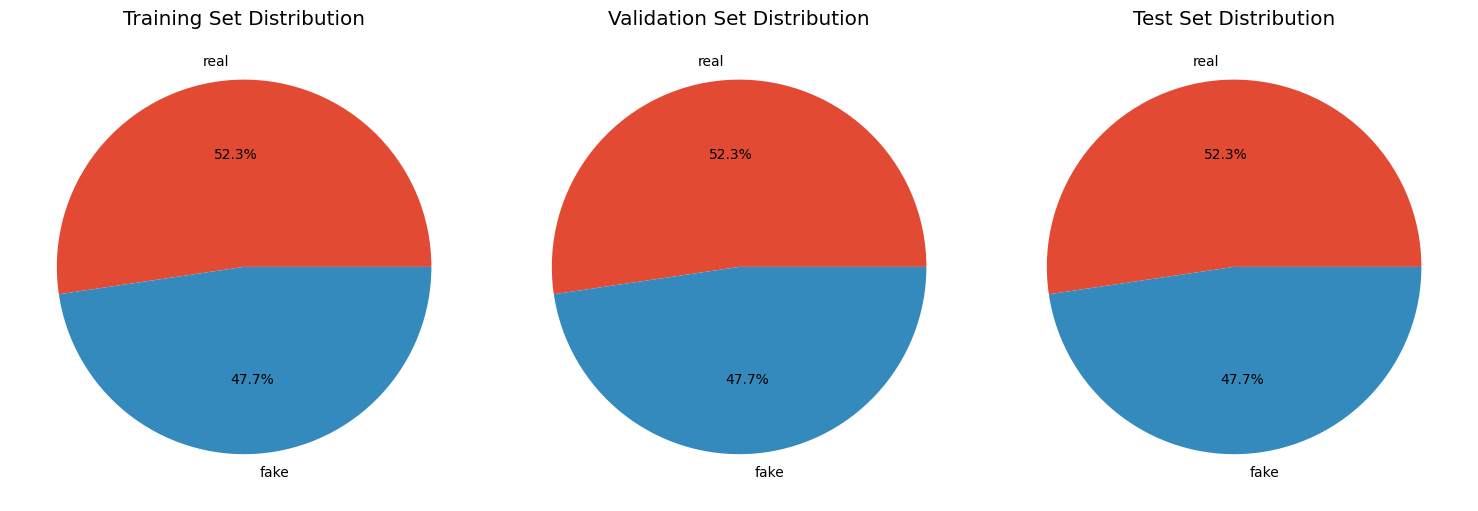

In [11]:
# Create visualization for class distribution
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Training set distribution
train_dist = train_df['label'].value_counts()
ax1.pie(train_dist.values, labels=train_dist.index, autopct='%1.1f%%')
ax1.set_title('Training Set Distribution')

# Validation set distribution
val_dist = val_df['label'].value_counts()
ax2.pie(val_dist.values, labels=val_dist.index, autopct='%1.1f%%')
ax2.set_title('Validation Set Distribution')

# Test set distribution
test_dist = test_df['label'].value_counts()
ax3.pie(test_dist.values, labels=test_dist.index, autopct='%1.1f%%')
ax3.set_title('Test Set Distribution')

plt.tight_layout()
plt.show()

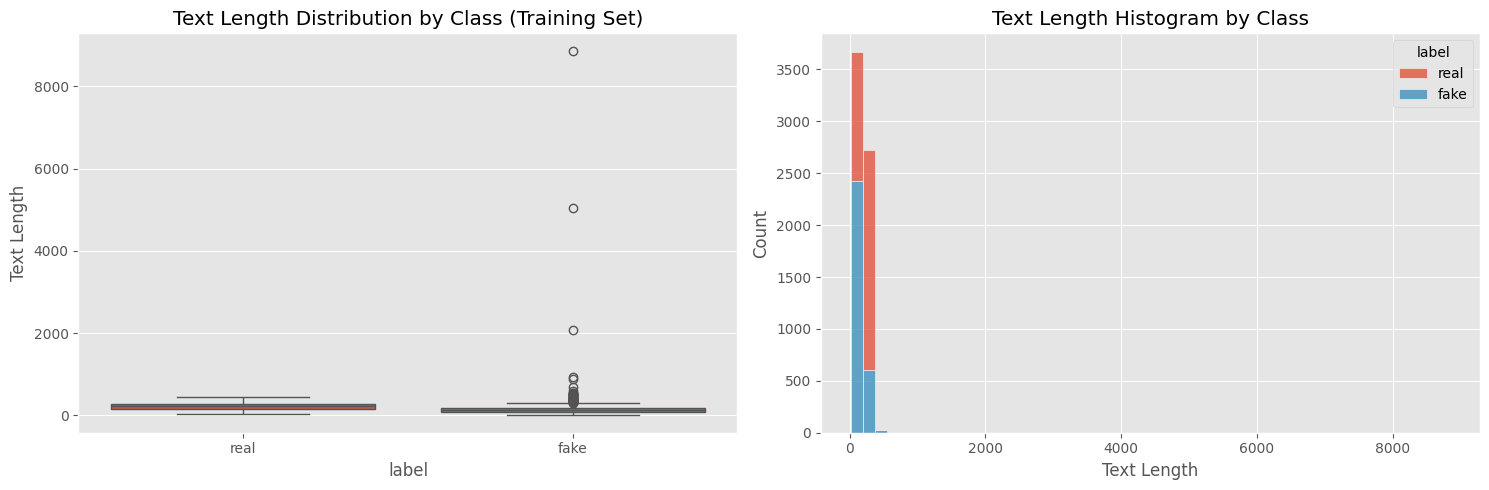


Text Length Statistics:

Training Set:
        count        mean         std   min    25%    50%    75%     max
label                                                                   
fake   3060.0  144.887582  200.755645  18.0   83.0  119.0  174.0  8846.0
real   3360.0  215.061310   65.294882  34.0  154.0  227.5  273.0   436.0


In [12]:
# Calculate text lengths
train_df['text_length'] = train_df['tweet'].str.len()
val_df['text_length'] = val_df['tweet'].str.len()
test_df['text_length'] = test_df['tweet'].str.len()

# Create visualizations for text length
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Box plot
sns.boxplot(data=train_df, x='label', y='text_length', ax=ax1)
ax1.set_title('Text Length Distribution by Class (Training Set)')
ax1.set_ylabel('Text Length')

# Histogram
sns.histplot(data=train_df, x='text_length', hue='label',
            multiple="stack", bins=50, ax=ax2)
ax2.set_title('Text Length Histogram by Class')
ax2.set_xlabel('Text Length')

plt.tight_layout()
plt.show()

# Print statistical summary
print("\nText Length Statistics:")
print("\nTraining Set:")
print(train_df.groupby('label')['text_length'].describe())

In [13]:
# Function to calculate basic text statistics
def get_text_stats(text):
    words = text.split()
    return {
        'word_count': len(words),
        'avg_word_length': np.mean([len(word) for word in words]),
        'special_chars': len(re.findall(r'[^a-zA-Z0-9\s]', text))
    }

# Calculate statistics for training set
text_stats = train_df['tweet'].apply(get_text_stats).apply(pd.Series)
train_df = pd.concat([train_df, text_stats], axis=1)

# Display summary statistics by class
print("=== Text Statistics by Class ===")
print("\nWord Count Statistics:")
print(train_df.groupby('label')['word_count'].describe())
print("\nAverage Word Length Statistics:")
print(train_df.groupby('label')['avg_word_length'].describe())
print("\nSpecial Characters Statistics:")
print(train_df.groupby('label')['special_chars'].describe())


=== Text Statistics by Class ===

Word Count Statistics:
        count       mean        std  min   25%   50%   75%     max
label                                                             
fake   3060.0  21.865359  32.992656  3.0  12.0  17.0  27.0  1456.0
real   3360.0  31.676488  10.824170  3.0  23.0  32.0  40.0    59.0

Average Word Length Statistics:
        count      mean       std  min     25%       50%       75%        max
label                                                                        
fake   3060.0  5.908808  1.342313  3.4  5.0000  5.582364  6.500000  15.750000
real   3360.0  6.030850  1.199813  3.5  5.1875  5.815789  6.702703  12.666667

Special Characters Statistics:
        count       mean       std  min  25%   50%   75%    max
label                                                          
fake   3060.0   6.641503  6.956403  0.0  2.0   5.0  10.0  171.0
real   3360.0  11.800595  6.988452  0.0  7.0  10.0  16.0   43.0


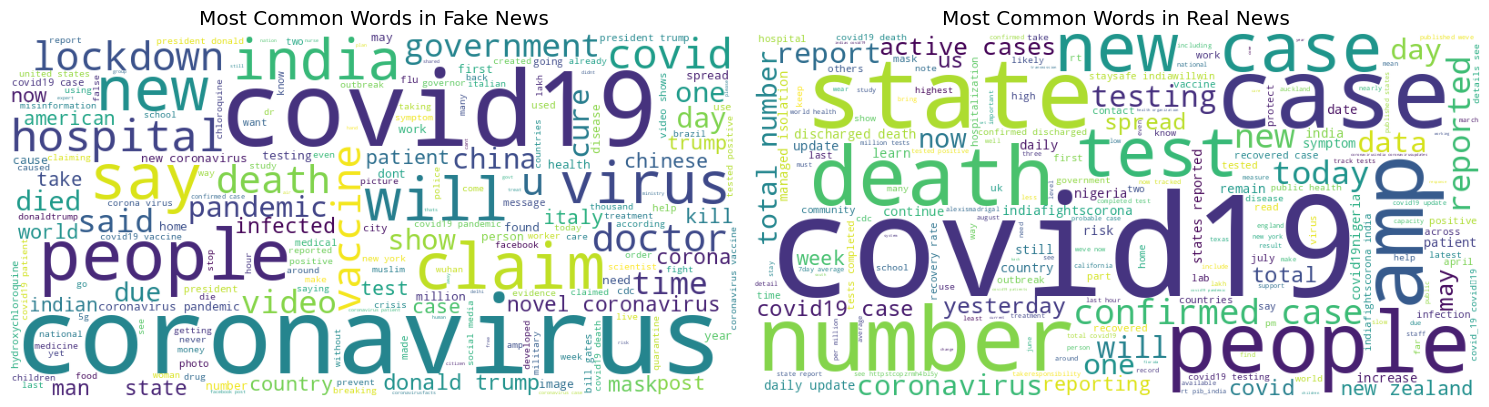

In [14]:
def preprocess_text(text):
    # Convert to lowercase and remove special characters
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text

# Generate word clouds for fake and real news
fake_texts = ' '.join(train_df[train_df['label'] == 'fake']['tweet'])
real_texts = ' '.join(train_df[train_df['label'] == 'real']['tweet'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Fake news word cloud
wordcloud_fake = WordCloud(width=800, height=400,
                         background_color='white').generate(preprocess_text(fake_texts))
ax1.imshow(wordcloud_fake)
ax1.axis('off')
ax1.set_title('Most Common Words in Fake News')

# Real news word cloud
wordcloud_real = WordCloud(width=800, height=400,
                         background_color='white').generate(preprocess_text(real_texts))
ax2.imshow(wordcloud_real)
ax2.axis('off')
ax2.set_title('Most Common Words in Real News')

plt.tight_layout()
plt.show()


In [15]:
# Analyze common phrases using bigrams
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')

# Analyze training set
fake_texts = train_df[train_df['label'] == 'fake']['tweet']
real_texts = train_df[train_df['label'] == 'real']['tweet']

# Get top phrases for fake news
fake_features = vectorizer.fit_transform(fake_texts)
fake_phrases = pd.DataFrame(
    fake_features.sum(axis=0).T,
    index=vectorizer.get_feature_names_out(),
    columns=['count']
).sort_values('count', ascending=False)

# Get top phrases for real news
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
real_features = vectorizer.fit_transform(real_texts)
real_phrases = pd.DataFrame(
    real_features.sum(axis=0).T,
    index=vectorizer.get_feature_names_out(),
    columns=['count']
).sort_values('count', ascending=False)

print("Top 10 Bigrams in Fake News:")
print(fake_phrases.head(10))
print("\nTop 10 Bigrams in Real News:")
print(real_phrases.head(10))


Top 10 Bigrams in Fake News:
                      count
covid 19               1018
donald trump             92
novel coronavirus        90
coronavirus https        71
coronavirus pandemic     65
new coronavirus          53
president trump          49
video shows              45
president donald         42
cure covid               39

Top 10 Bigrams in Real News:
                 count
covid 19           711
new cases          304
confirmed cases    292
total number       201
active cases       196
cases covid19      144
covid19 cases      125
new zealand        123
cases covid        121
states reported    116


In [17]:
# Create summary dictionary
summary_stats = {
    'Dataset Sizes': {
        'Training Set': len(train_df),
        'Validation Set': len(val_df),
        'Test Set': len(test_df)
    },
    'Class Distribution': {
        'Training Set': train_df['label'].value_counts(normalize=True).to_dict(),
        'Validation Set': val_df['label'].value_counts(normalize=True).to_dict(),
        'Test Set': test_df['label'].value_counts(normalize=True).to_dict()
    },
    'Text Length Statistics': {
        'Training Set': {
            'Mean': train_df['text_length'].mean(),
            'Median': train_df['text_length'].median(),
            'Std': train_df['text_length'].std()
        }
    },
    'Word Count Statistics': {
        'Mean': train_df['word_count'].mean(),
        'Median': train_df['word_count'].median(),
        'Std': train_df['word_count'].std()
    }
}

# Display summary
print("=== Dataset Analysis Summary ===")
for key, value in summary_stats.items():
    print(f"\n{key}:")
    print(value)

=== Dataset Analysis Summary ===

Dataset Sizes:
{'Training Set': 6420, 'Validation Set': 2140, 'Test Set': 2140}

Class Distribution:
{'Training Set': {'real': 0.5233644859813084, 'fake': 0.4766355140186916}, 'Validation Set': {'real': 0.5233644859813084, 'fake': 0.4766355140186916}, 'Test Set': {'real': 0.5233644859813084, 'fake': 0.4766355140186916}}

Text Length Statistics:
{'Training Set': {'Mean': 181.6140186915888, 'Median': 169.0, 'Std': 150.5525542471081}}

Word Count Statistics:
{'Mean': 27.000155763239874, 'Median': 25.0, 'Std': 24.577676033151114}


## Feature Engineering

In [18]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [19]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove user @ references and '#' from tweet
    text = re.sub(r'\@\w+|\#', '', text)

    # Remove punctuations and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Clean the text
    text = clean_text(text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)

# Apply preprocessing to all datasets
train_df['processed_text'] = train_df['tweet'].apply(preprocess_text)
val_df['processed_text'] = val_df['tweet'].apply(preprocess_text)
test_df['processed_text'] = test_df['tweet'].apply(preprocess_text)

print("Text preprocessing completed.")
print("\nSample of processed text:")
print(train_df[['tweet', 'processed_text']].head())

Text preprocessing completed.

Sample of processed text:
                                               tweet  \
0  The CDC currently reports 99031 deaths. In gen...   
1  States reported 1121 deaths a small rise from ...   
2  Politically Correct Woman (Almost) Uses Pandem...   
3  #IndiaFightsCorona: We have 1524 #COVID testin...   
4  Populous states can generate large case counts...   

                                      processed_text  
0  cdc currently report death general discrepancy...  
1  state reported death small rise last tuesday s...  
2  politically correct woman almost us pandemic e...  
3  indiafightscorona covid testing laboratory ind...  
4  populous state generate large case count look ...  


In [20]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
tfidf_train = tfidf_vectorizer.fit_transform(train_df['processed_text'])
tfidf_val = tfidf_vectorizer.transform(val_df['processed_text'])
tfidf_test = tfidf_vectorizer.transform(test_df['processed_text'])

print("TF-IDF Vectorization completed.")
print(f"TF-IDF feature shape for training set: {tfidf_train.shape}")
print(f"TF-IDF feature shape for validation set: {tfidf_val.shape}")
print(f"TF-IDF feature shape for test set: {tfidf_test.shape}")

# Display top TF-IDF features
feature_names = tfidf_vectorizer.get_feature_names_out()
top_tfidf_features = tfidf_train.sum(axis=0).A1
top_feature_indices = top_tfidf_features.argsort()[-20:][::-1]

print("\nTop 20 TF-IDF features:")
for idx in top_feature_indices:
    print(f"{feature_names[idx]}: {top_tfidf_features[idx]:.4f}")

TF-IDF Vectorization completed.
TF-IDF feature shape for training set: (6420, 5000)
TF-IDF feature shape for validation set: (2140, 5000)
TF-IDF feature shape for test set: (2140, 5000)

Top 20 TF-IDF features:
covid: 320.9376
case: 244.0924
coronavirus: 225.0976
test: 145.3065
new: 144.9386
state: 136.8943
death: 125.6469
people: 110.5357
number: 108.5638
day: 90.0701
india: 89.7384
total: 87.8647
reported: 85.4118
confirmed: 83.5785
testing: 74.6518
vaccine: 73.5073
report: 71.9207
today: 70.0484
hospital: 69.2744
health: 67.6138


In [ ]:
def extract_statistical_features(text):
    return {
        'char_count': len(text),
        'word_count': len(text.split()),
        'unique_word_count': len(set(text.split())),
        'avg_word_length': np.mean([len(word) for word in text.split()]),
        'stopword_count': len([word for word in text.split() if word in stop_words])
    }

# Extract statistical features
train_stats = pd.DataFrame(train_df['processed_text'].apply(extract_statistical_features).tolist())
val_stats = pd.DataFrame(val_df['processed_text'].apply(extract_statistical_features).tolist())
test_stats = pd.DataFrame(test_df['processed_text'].apply(extract_statistical_features).tolist())

# Add statistical features to the dataframes
train_df = pd.concat([train_df, train_stats], axis=1)
val_df = pd.concat([val_df, val_stats], axis=1)
test_df = pd.concat([test_df, test_stats], axis=1)

print("Statistical features extracted.")
print("\nSample of statistical features:")
print(train_df[['tweet', 'char_count', 'word_count', 'unique_word_count', 'avg_word_length', 'stopword_count']].head())

Word2Vec embeddings generated.
Word2Vec feature shape for training set: (6420, 100)
Word2Vec feature shape for validation set: (2140, 100)
Word2Vec feature shape for test set: (2140, 100)


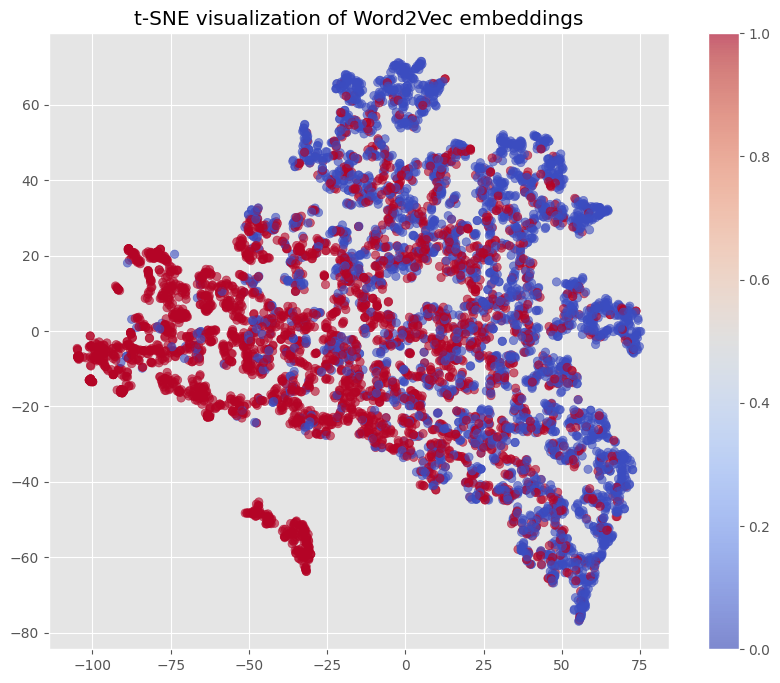

In [22]:
# Tokenize the processed text
train_tokens = [text.split() for text in train_df['processed_text']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=train_tokens, vector_size=100, window=5, min_count=1, workers=4)

def get_document_vector(text, model):
    words = text.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

# Generate document vectors
train_w2v = np.array([get_document_vector(text, word2vec_model) for text in train_df['processed_text']])
val_w2v = np.array([get_document_vector(text, word2vec_model) for text in val_df['processed_text']])
test_w2v = np.array([get_document_vector(text, word2vec_model) for text in test_df['processed_text']])

print("Word2Vec embeddings generated.")
print(f"Word2Vec feature shape for training set: {train_w2v.shape}")
print(f"Word2Vec feature shape for validation set: {val_w2v.shape}")
print(f"Word2Vec feature shape for test set: {test_w2v.shape}")

# Visualize Word2Vec embeddings using t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
train_w2v_2d = tsne.fit_transform(train_w2v)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_w2v_2d[:, 0], train_w2v_2d[:, 1], c=train_df['label'].map({'fake': 0, 'real': 1}), cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter)
plt.title('t-SNE visualization of Word2Vec embeddings')
plt.show()


In [23]:
# Combine all features
train_features = np.hstack([tfidf_train.toarray(), train_stats.values, train_w2v])
val_features = np.hstack([tfidf_val.toarray(), val_stats.values, val_w2v])
test_features = np.hstack([tfidf_test.toarray(), test_stats.values, test_w2v])

print("Feature engineering completed.")
print(f"Final feature shape for training set: {train_features.shape}")
print(f"Final feature shape for validation set: {val_features.shape}")
print(f"Final feature shape for test set: {test_features.shape}")

# Summary of feature types
feature_summary = {
    'TF-IDF': tfidf_train.shape[1],
    'Statistical': train_stats.shape[1],
    'Word2Vec': train_w2v.shape[1],
    'Total': train_features.shape[1]
}

print("\nFeature Type Summary:")
for feature_type, count in feature_summary.items():
    print(f"{feature_type}: {count} features")

# Save features for later use
np.save('train_features.npy', train_features)
np.save('val_features.npy', val_features)
np.save('test_features.npy', test_features)

print("\nFeatures saved to files: train_features.npy, val_features.npy, test_features.npy")


Feature engineering completed.
Final feature shape for training set: (6420, 5105)
Final feature shape for validation set: (2140, 5105)
Final feature shape for test set: (2140, 5105)

Feature Type Summary:
TF-IDF: 5000 features
Statistical: 5 features
Word2Vec: 100 features
Total: 5105 features

Features saved to files: train_features.npy, val_features.npy, test_features.npy


## Model Development

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the features and labels
X_train = np.load('train_features.npy')
X_val = np.load('val_features.npy')
X_test = np.load('test_features.npy')

# Load the original dataframes to get the labels
train_df = pd.read_csv('data/Constraint_Train.csv')
val_df = pd.read_csv('data/Constraint_Val.csv')
test_df = pd.read_csv('data/english_test_with_labels.csv')

y_train = train_df['label'].map({'fake': 0, 'real': 1})
y_val = val_df['label'].map({'fake': 0, 'real': 1})
y_test = test_df['label'].map({'fake': 0, 'real': 1})

print("Data loaded successfully.")
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

Data loaded successfully.
Training set shape: (6420, 5105)
Validation set shape: (2140, 5105)
Test set shape: (2140, 5105)


In [25]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Linear SVC': LinearSVC(random_state=42),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(random_state=42),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42)
}

def evaluate_model(model, X_train, y_train, X_val, y_val):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, train_pred)
    val_accuracy = accuracy_score(y_val, val_pred)

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    return train_accuracy, val_accuracy, cv_scores.mean()

# Evaluate all models
results = {}
for name, model in models.items():
    train_acc, val_acc, cv_score = evaluate_model(model, X_train, y_train, X_val, y_val)
    results[name] = {'Train Accuracy': train_acc, 'Validation Accuracy': val_acc, 'CV Score': cv_score}

# Display results
results_df = pd.DataFrame(results).T
results_df

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

                               Train Accuracy  Validation Accuracy  CV Score
Logistic Regression                  0.879439             0.864953  0.833801
Linear SVC                           0.991121             0.921028  0.919626
Passive Aggressive Classifier        0.695483             0.703738  0.629751
Decision Tree Classifier             1.000000             0.828972  0.819782


<Figure size 1200x600 with 0 Axes>

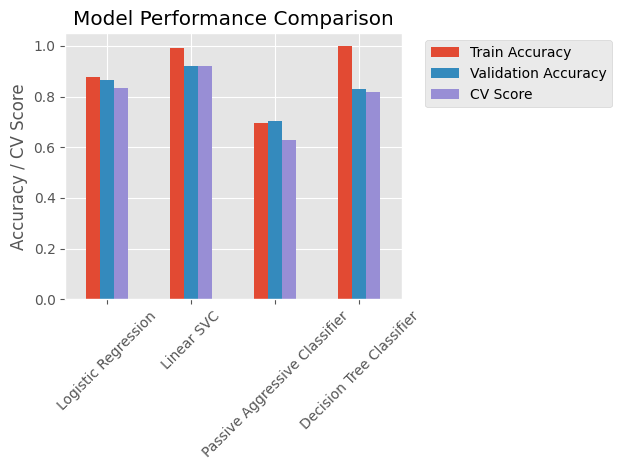

In [28]:
# Visualize results
plt.figure(figsize=(12, 6))
results_df.plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy / CV Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [29]:
# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'Linear SVC': {
        'C': [0.1, 1, 10],
        'loss': ['hinge', 'squared_hinge']
    },
    'Passive Aggressive Classifier': {
        'C': [0.1, 1, 10],
        'loss': ['hinge', 'squared_hinge']
    },
    'Decision Tree Classifier': {
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

# Perform GridSearchCV for each model
best_models = {}
for name, model in models.items():
    print(f"\nPerforming GridSearchCV for {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    best_models[name] = grid_search.best_estimator_

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Evaluate best models
best_results = {}
for name, model in best_models.items():
    train_acc, val_acc, cv_score = evaluate_model(model, X_train, y_train, X_val, y_val)
    best_results[name] = {'Train Accuracy': train_acc, 'Validation Accuracy': val_acc, 'CV Score': cv_score}

# Display results for best models
best_results_df = pd.DataFrame(best_results).T
print("\nResults for best models after hyperparameter optimization:")
print(best_results_df)


Performing GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.9182

Performing GridSearchCV for Linear SVC...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Linear SVC: {'C': 1, 'loss': 'squared_hinge'}
Best cross-validation score: 0.9196

Performing GridSearchCV for Passive Aggressive Classifier...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Passive Aggressive Classifier: {'C': 0.1, 'loss': 'squared_hinge'}
Best cross-validation score: 0.6301

Performing GridSearchCV for Decision Tree Classifier...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Decision Tree Classifier: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.8332


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Results for best models after hyperparameter optimization:
                               Train Accuracy  Validation Accuracy  CV Score
Logistic Regression                  0.978505             0.914953  0.918224
Linear SVC                           0.991121             0.921028  0.919626
Passive Aggressive Classifier        0.695483             0.704206  0.630062
Decision Tree Classifier             0.901090             0.834112  0.833178


<Figure size 1200x600 with 0 Axes>

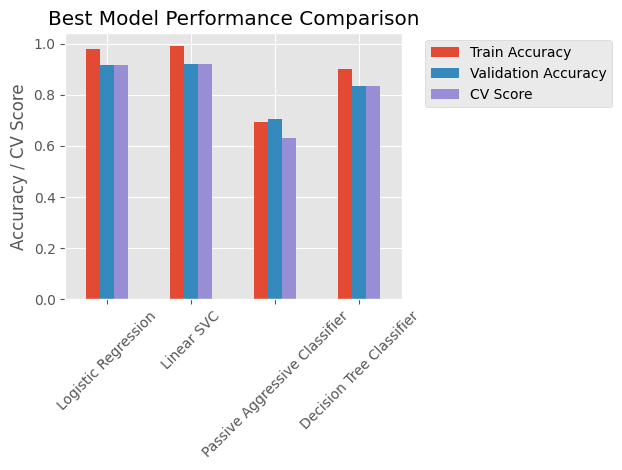

In [30]:
# Visualize results for best models
plt.figure(figsize=(12, 6))
best_results_df.plot(kind='bar')
plt.title('Best Model Performance Comparison')
plt.ylabel('Accuracy / CV Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Best performing model: Linear SVC

Test Accuracy: 0.9271

Classification Report:
              precision    recall  f1-score   support

        Fake       0.93      0.92      0.92      1020
        Real       0.93      0.93      0.93      1120

    accuracy                           0.93      2140
   macro avg       0.93      0.93      0.93      2140
weighted avg       0.93      0.93      0.93      2140



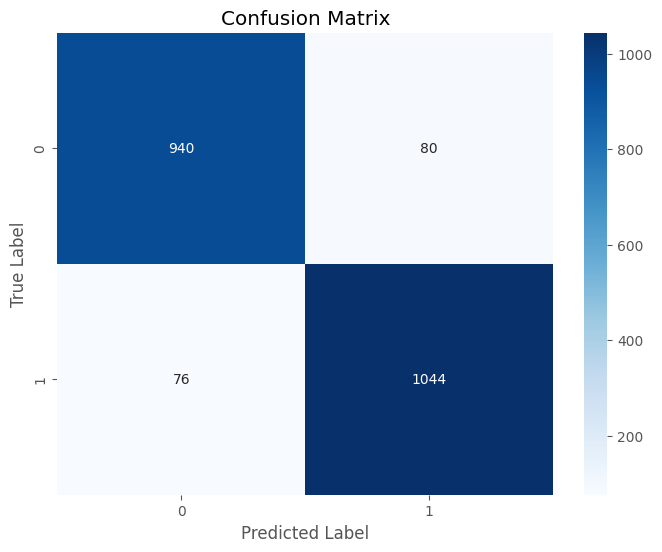

In [31]:
# Select the best performing model
best_model_name = best_results_df['Validation Accuracy'].idxmax()
best_model = best_models[best_model_name]

print(f"Best performing model: {best_model_name}")

# Train the best model on the combined training and validation data
X_train_val = np.vstack((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))
best_model.fit(X_train_val, y_train_val)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

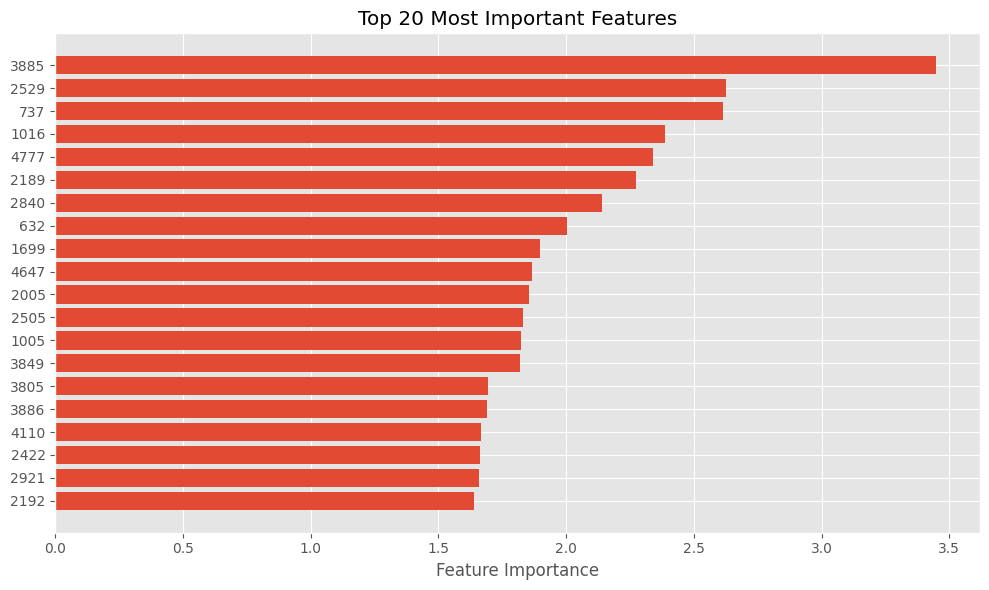

In [32]:
# If the best model is Logistic Regression or Linear SVC, we can examine feature importance
if isinstance(best_model, (LogisticRegression, LinearSVC)):
    feature_importance = abs(best_model.coef_[0])
    feature_names = np.arange(len(feature_importance))  # We don't have actual feature names

    # Sort features by importance
    sorted_idx = np.argsort(feature_importance)
    sorted_features = feature_names[sorted_idx]
    sorted_importance = feature_importance[sorted_idx]

    # Plot top 20 most important features
    plt.figure(figsize=(10, 6))
    plt.barh(range(20), sorted_importance[-20:])
    plt.yticks(range(20), sorted_features[-20:])
    plt.xlabel('Feature Importance')
    plt.title('Top 20 Most Important Features')
    plt.tight_layout()
    plt.show()

## Validation and Testing

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, classification_report,
                           roc_curve, auc, precision_recall_curve)

# Load the best model and data from previous phase
print(f"Using best model: {best_model_name}")
print("\nModel Parameters:")
print(best_model.get_params())


Using best model: Linear SVC

Model Parameters:
{'C': 1, 'class_weight': None, 'dual': 'auto', 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 42, 'tol': 0.0001, 'verbose': 0}


Performance Metrics:
           Training  Validation      Test
Accuracy   0.987850    0.986916  0.927103
Precision  0.989851    0.989247  0.928826
Recall     0.986905    0.985714  0.932143
F1 Score   0.988376    0.987478  0.930481


<Figure size 1200x600 with 0 Axes>

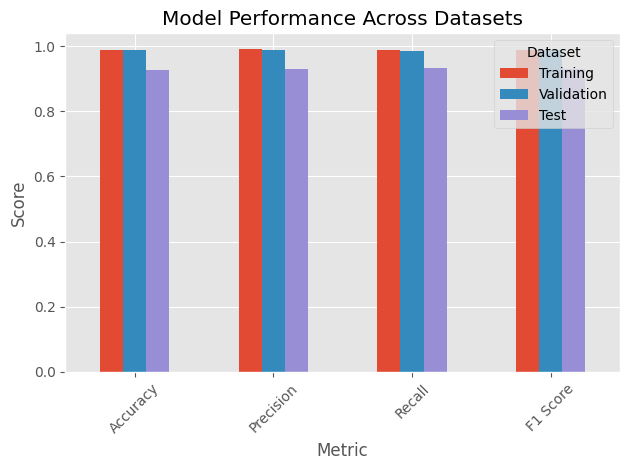

In [34]:
def evaluate_metrics(y_true, y_pred, y_pred_proba=None):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

    return metrics

# Evaluate on training, validation, and test sets
train_pred = best_model.predict(X_train)
val_pred = best_model.predict(X_val)
test_pred = best_model.predict(X_test)

# Get probabilities if the model supports it
try:
    train_proba = best_model.predict_proba(X_train)[:, 1]
    val_proba = best_model.predict_proba(X_val)[:, 1]
    test_proba = best_model.predict_proba(X_test)[:, 1]
    has_proba = True
except:
    has_proba = False

# Calculate metrics for all sets
train_metrics = evaluate_metrics(y_train, train_pred)
val_metrics = evaluate_metrics(y_val, val_pred)
test_metrics = evaluate_metrics(y_test, test_pred)

# Create DataFrame with all metrics
metrics_df = pd.DataFrame({
    'Training': train_metrics,
    'Validation': val_metrics,
    'Test': test_metrics
})

print("Performance Metrics:")
print(metrics_df)

# Visualize metrics
plt.figure(figsize=(12, 6))
metrics_df.plot(kind='bar')
plt.title('Model Performance Across Datasets')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()


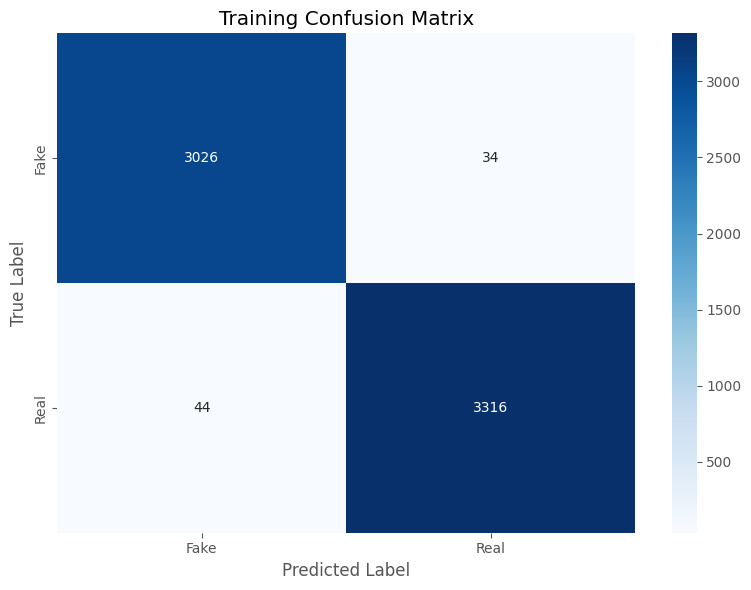

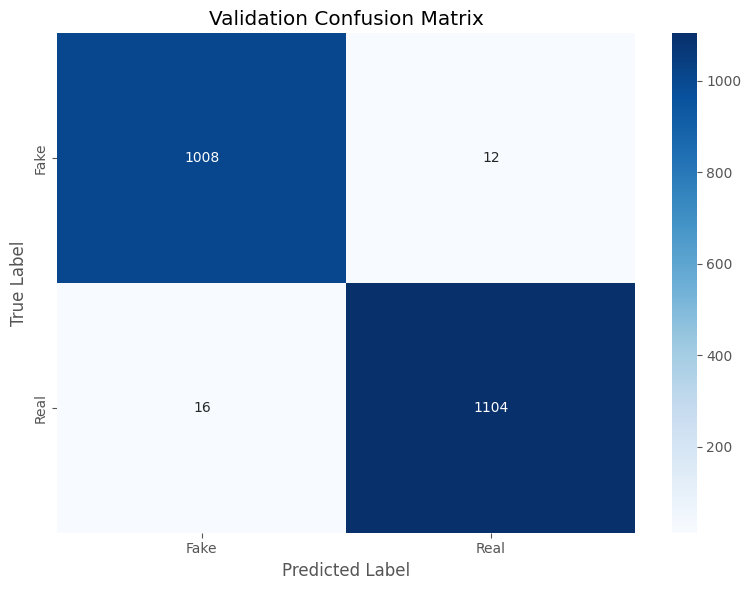

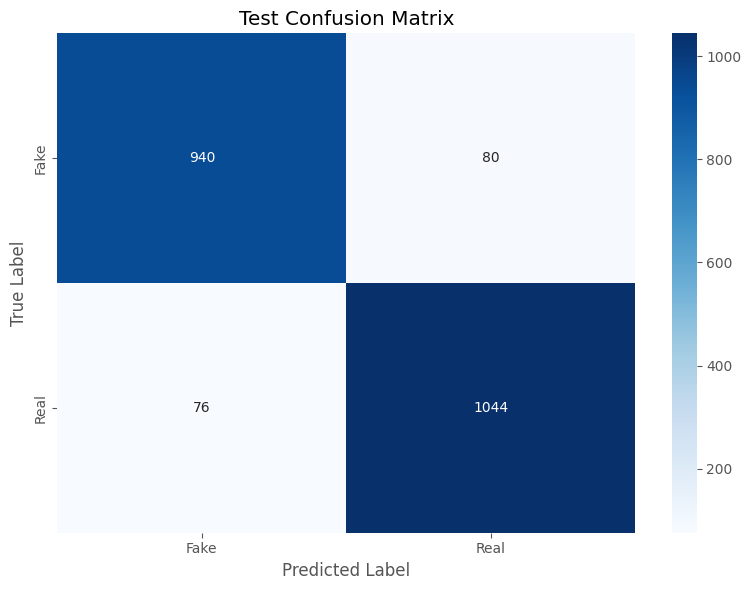

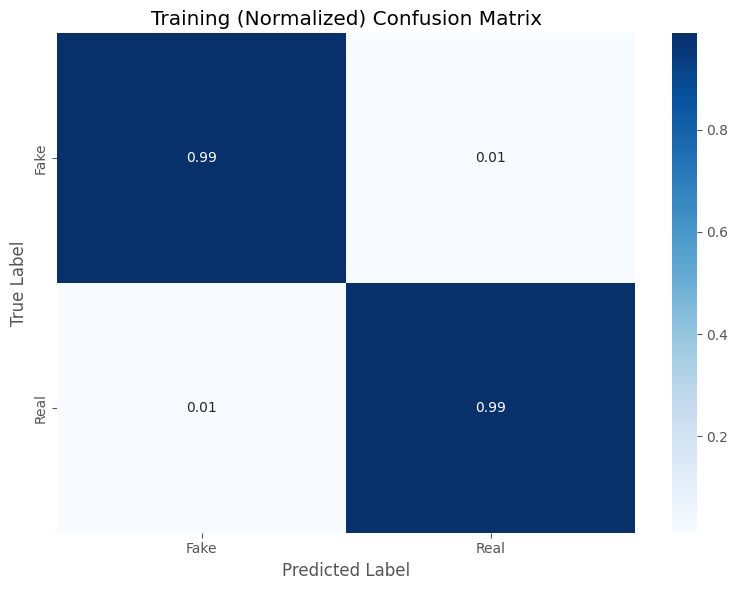

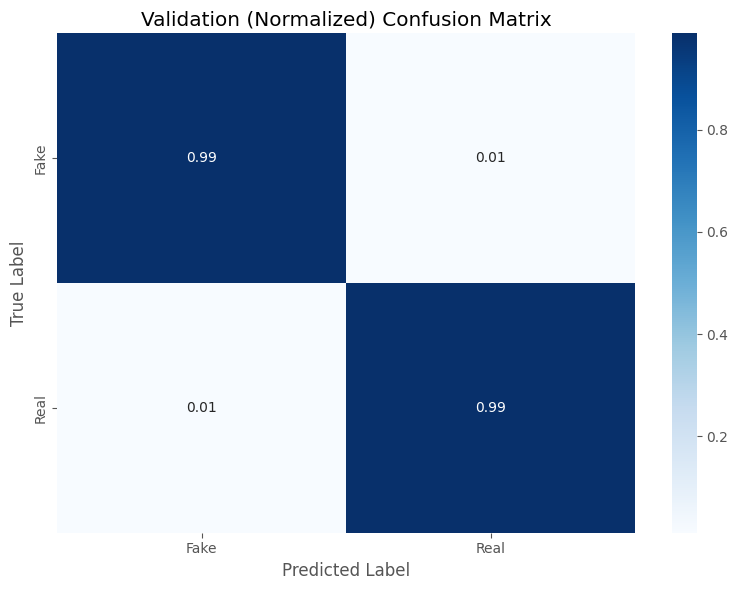

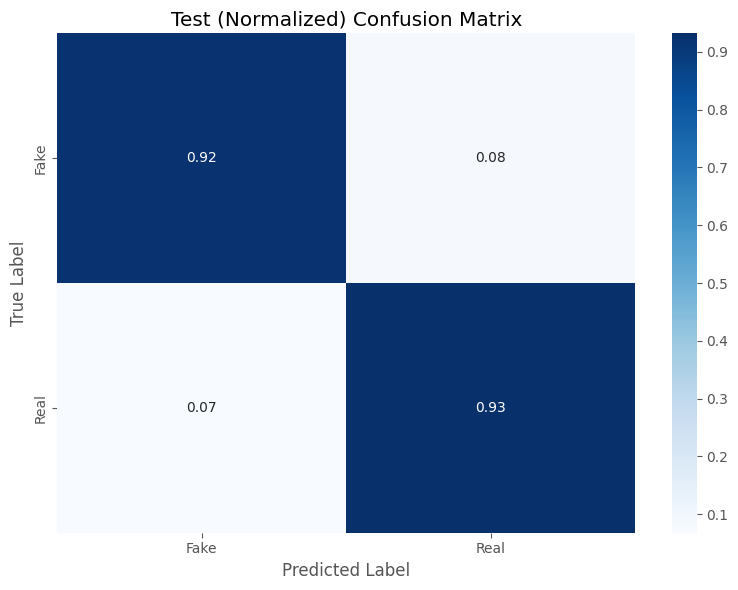

In [35]:
def plot_confusion_matrix(y_true, y_pred, title, normalize=False):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd',
                cmap='Blues', xticklabels=['Fake', 'Real'],
                yticklabels=['Fake', 'Real'])
    plt.title(f'{title} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Plot confusion matrices for all sets
plot_confusion_matrix(y_train, train_pred, "Training")
plot_confusion_matrix(y_val, val_pred, "Validation")
plot_confusion_matrix(y_test, test_pred, "Test")

# Plot normalized confusion matrices
plot_confusion_matrix(y_train, train_pred, "Training (Normalized)", normalize=True)
plot_confusion_matrix(y_val, val_pred, "Validation (Normalized)", normalize=True)
plot_confusion_matrix(y_test, test_pred, "Test (Normalized)", normalize=True)


In [36]:
if has_proba:
    # Plot ROC curves
    plt.figure(figsize=(10, 6))

    # Training set
    fpr_train, tpr_train, _ = roc_curve(y_train, train_proba)
    roc_auc_train = auc(fpr_train, tpr_train)
    plt.plot(fpr_train, tpr_train, label=f'Training (AUC = {roc_auc_train:.2f})')

    # Validation set
    fpr_val, tpr_val, _ = roc_curve(y_val, val_proba)
    roc_auc_val = auc(fpr_val, tpr_val)
    plt.plot(fpr_val, tpr_val, label=f'Validation (AUC = {roc_auc_val:.2f})')

    # Test set
    fpr_test, tpr_test, _ = roc_curve(y_test, test_proba)
    roc_auc_test = auc(fpr_test, tpr_test)
    plt.plot(fpr_test, tpr_test, label=f'Test (AUC = {roc_auc_test:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')
    plt.show()

    # Plot Precision-Recall curves
    plt.figure(figsize=(10, 6))

    # Training set
    precision_train, recall_train, _ = precision_recall_curve(y_train, train_proba)
    plt.plot(recall_train, precision_train, label='Training')

    # Validation set
    precision_val, recall_val, _ = precision_recall_curve(y_val, val_proba)
    plt.plot(recall_val, precision_val, label='Validation')

    # Test set
    precision_test, recall_test, _ = precision_recall_curve(y_test, test_proba)
    plt.plot(recall_test, precision_test, label='Test')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves')
    plt.legend()
    plt.show()


In [37]:
def analyze_errors(X, y_true, y_pred, texts, title):
    errors = y_true != y_pred
    error_indices = np.where(errors)[0]

    print(f"\n=== {title} Error Analysis ===")
    print(f"Total errors: {len(error_indices)}")
    print(f"Error rate: {len(error_indices)/len(y_true):.2%}")

    # Analyze false positives and false negatives
    fp_indices = np.where((y_true == 0) & (y_pred == 1))[0]
    fn_indices = np.where((y_true == 1) & (y_pred == 0))[0]

    print("\nFalse Positives (Predicted Real when actually Fake):", len(fp_indices))
    print("False Negatives (Predicted Fake when actually Real):", len(fn_indices))

    # Sample of misclassified examples
    print("\nSample of False Positives:")
    for idx in fp_indices[:5]:
        print(f"Text: {texts[idx][:100]}...")

    print("\nSample of False Negatives:")
    for idx in fn_indices[:5]:
        print(f"Text: {texts[idx][:100]}...")

    return error_indices, fp_indices, fn_indices

# Analyze errors for all sets
train_errors = analyze_errors(X_train, y_train, train_pred, train_df['tweet'], "Training")
val_errors = analyze_errors(X_val, y_val, val_pred, val_df['tweet'], "Validation")
test_errors = analyze_errors(X_test, y_test, test_pred, test_df['tweet'], "Test")



=== Training Error Analysis ===
Total errors: 78
Error rate: 1.21%

False Positives (Predicted Real when actually Fake): 34
False Negatives (Predicted Fake when actually Real): 44

Sample of False Positives:
Text: Scientists are expressing cautious optimism that a COVID-19 vaccine can be ready to go by the late s...
Text: Antibodies for the common cold produce a positive COVID-19 test. False-positive results from COVID-1...
Text: @MathGuy_7 @HedgeyeDJ Thank you - extremely insightful. Is there one or two trusted websites that yo...
Text: The first test results for the Moderna vaccine are disappointing....
Text: ???The State of Florida has announced measures that all workplaces with 10 employees or more are to ...

Sample of False Negatives:
Text: Coronavirus parties can have deadly consequences. https://t.co/WTriJWJu9T...
Text: A person who has been released from quarantine or isolation does not pose a risk of spreading #COVID...
Text: .@WHO reconsiders the airborne nature of #COVID19

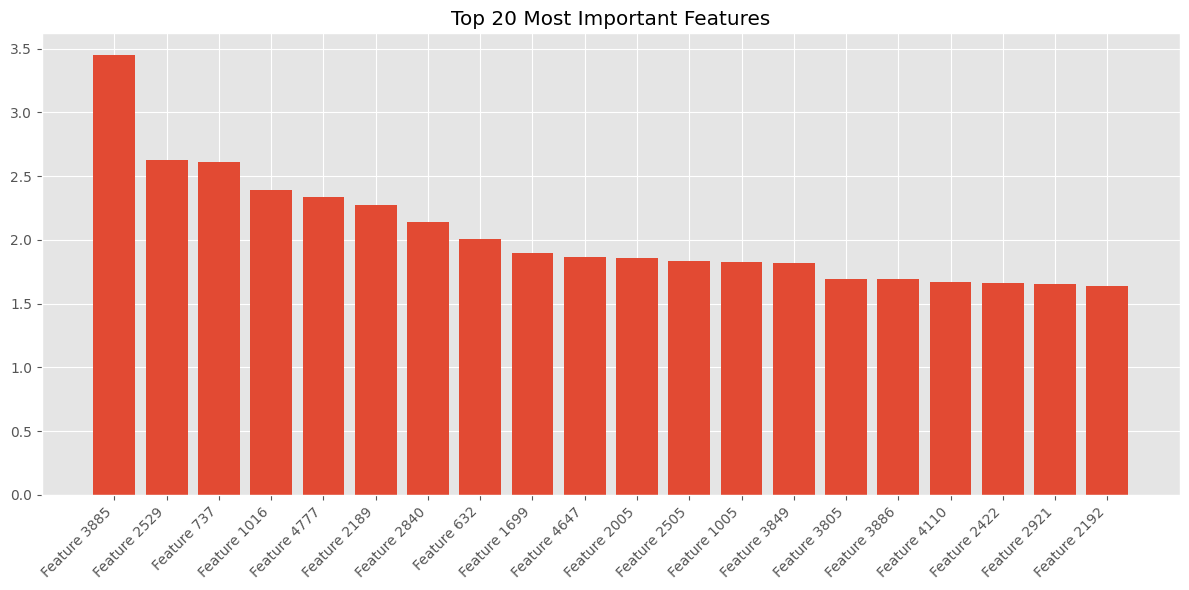


Top 10 Most Important Features:
           Feature  Importance
3885  Feature 3885    3.447710
2529  Feature 2529    2.625116
737    Feature 737    2.613340
1016  Feature 1016    2.388328
4777  Feature 4777    2.340280
2189  Feature 2189    2.273887
2840  Feature 2840    2.139975
632    Feature 632    2.005095
1699  Feature 1699    1.896017
4647  Feature 4647    1.865376


In [38]:
def analyze_feature_importance(model, feature_names=None):
    if hasattr(model, 'coef_'):
        # For linear models
        importance = abs(model.coef_[0])
    elif hasattr(model, 'feature_importances_'):
        # For tree-based models
        importance = model.feature_importances_
    else:
        print("Model does not support feature importance analysis")
        return

    if feature_names is None:
        feature_names = [f'Feature {i}' for i in range(len(importance))]

    # Sort features by importance
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values('Importance', ascending=False)

    # Plot top 20 features
    plt.figure(figsize=(12, 6))
    plt.bar(range(20), feature_importance['Importance'][:20])
    plt.xticks(range(20), feature_importance['Feature'][:20], rotation=45, ha='right')
    plt.title('Top 20 Most Important Features')
    plt.tight_layout()
    plt.show()

    return feature_importance

# Analyze feature importance if the model supports it
feature_importance = analyze_feature_importance(best_model)
if feature_importance is not None:
    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))


In [ ]:
# Create a comprehensive summary report
summary = {
    'Model Information': {
        'Best Model': best_model_name,
        'Model Parameters': best_model.get_params()
    },
    'Performance Metrics': metrics_df.to_dict(),
    'Error Analysis': {
        'Training Errors': len(train_errors[0]),
        'Validation Errors': len(val_errors[0]),
        'Test Errors': len(test_errors[0]),
        'Training Error Rate': len(train_errors[0])/len(y_train),
        'Validation Error Rate': len(val_errors[0])/len(y_val),
        'Test Error Rate': len(test_errors[0])/len(y_test)
    }
}

# Save summary report
import json
with open('model_evaluation_summary.json', 'w') as f:
    json.dump(summary, f, indent=4)

print("=== Model Evaluation Summary ===")
print("\nModel Information:")
print(f"Best Model: {best_model_name}")
print("\nAverage Performance Metrics:")
print(metrics_df.mean())
print("\nDetailed summary saved to 'model_evaluation_summary.json'")
